In [7]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as tkr

plt.rcParams['figure.figsize'] = [10, 5]

# RFM

In [13]:
df=pd.read_csv('transactions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934958 entries, 0 to 934957
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   trans_id  934958 non-null  int64 
 1   item_id   934958 non-null  object
 2   cust_id   934958 non-null  object
 3   quantity  934958 non-null  int64 
 4   pur_date  934958 non-null  object
dtypes: int64(2), object(3)
memory usage: 35.7+ MB


In [14]:
df.head()

,trans_id,item_id,cust_id,quantity,pur_date
0,1,p_734,c_235717,16,12/17/2021
1,1,p_67,c_235717,10,8/22/2021
2,1,p_873,c_235717,8,2/11/2021
3,2,p_57,c_180583,15,2/9/2022
4,2,p_570,c_180583,20,12/22/2021


In [15]:
df_prices=pd.read_excel('Product_Prices.xlsx')

In [16]:
df_prices.head()

,item_id,unit_price
0,p_1,6
1,p_2,13
2,p_3,31
3,p_4,37
4,p_5,40


In [17]:
df["pur_date"] = pd.to_datetime(df["pur_date"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934958 entries, 0 to 934957
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   trans_id  934958 non-null  int64         
 1   item_id   934958 non-null  object        
 2   cust_id   934958 non-null  object        
 3   quantity  934958 non-null  int64         
 4   pur_date  934958 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 35.7+ MB


In [19]:
df = df.merge(df_prices, on="item_id", how='left')
df.head()

,trans_id,item_id,cust_id,quantity,pur_date,unit_price
0,1,p_734,c_235717,16,2021-12-17,20
1,1,p_67,c_235717,10,2021-08-22,42
2,1,p_873,c_235717,8,2021-02-11,2
3,2,p_57,c_180583,15,2022-02-09,35
4,2,p_570,c_180583,20,2021-12-22,38


In [20]:
df["TotalSum"] = df["quantity"] * df["unit_price"]
df.head()

,trans_id,item_id,cust_id,quantity,pur_date,unit_price,TotalSum
0,1,p_734,c_235717,16,2021-12-17,20,320
1,1,p_67,c_235717,10,2021-08-22,42,420
2,1,p_873,c_235717,8,2021-02-11,2,16
3,2,p_57,c_180583,15,2022-02-09,35,525
4,2,p_570,c_180583,20,2021-12-22,38,760


In [25]:
df["Recency"] = (df["pur_date"].max() - df["pur_date"]).dt.days
df.head()

,trans_id,item_id,cust_id,quantity,pur_date,unit_price,TotalSum,Recency
0,1,p_734,c_235717,16,2021-12-17,20,320,135
1,1,p_67,c_235717,10,2021-08-22,42,420,252
2,1,p_873,c_235717,8,2021-02-11,2,16,444
3,2,p_57,c_180583,15,2022-02-09,35,525,81
4,2,p_570,c_180583,20,2021-12-22,38,760,130


In [27]:
# Column in certain position

#df.insert (3, "Recency2", 2*df["Recency"])
#df.head()

,trans_id,item_id,cust_id,Recency2,quantity,pur_date,unit_price,TotalSum,Recency
0,1,p_734,c_235717,270,16,2021-12-17,20,320,135
1,1,p_67,c_235717,504,10,2021-08-22,42,420,252
2,1,p_873,c_235717,888,8,2021-02-11,2,16,444
3,2,p_57,c_180583,162,15,2022-02-09,35,525,81
4,2,p_570,c_180583,260,20,2021-12-22,38,760,130


In [29]:
df.head()

,trans_id,item_id,cust_id,quantity,pur_date,unit_price,TotalSum,Recency
0,1,p_734,c_235717,16,2021-12-17,20,320,135
1,1,p_67,c_235717,10,2021-08-22,42,420,252
2,1,p_873,c_235717,8,2021-02-11,2,16,444
3,2,p_57,c_180583,15,2022-02-09,35,525,81
4,2,p_570,c_180583,20,2021-12-22,38,760,130


In [32]:
df["pur_date"].max()

Timestamp('2022-05-01 00:00:00')

In [30]:
df["Recency"].min()

0

In [31]:
df["Recency"].max()

485

In [34]:
data_process = df.groupby(["cust_id"]).agg({"Recency": np.min,
                                               "pur_date": pd.Series.nunique,
                                               "TotalSum": np.sum}).reset_index()

data_process

,cust_id,Recency,pur_date,TotalSum
0,c_100,120,4,360
1,c_10000,363,1,100
2,c_100001,275,1,792
3,c_100002,385,1,195
4,c_100003,29,2,380
...,...,...,...,...
273839,c_99988,100,4,1055
273840,c_99989,64,3,236
273841,c_9999,18,3,588
273842,c_99991,104,1,60


In [35]:
#Rename columns

data_process.rename(columns={"Recency":"Recency", "pur_date":"Frequency", "TotalSum":"Monetary"}, inplace = True)
data_process

,cust_id,Recency,Frequency,Monetary
0,c_100,120,4,360
1,c_10000,363,1,100
2,c_100001,275,1,792
3,c_100002,385,1,195
4,c_100003,29,2,380
...,...,...,...,...
273839,c_99988,100,4,1055
273840,c_99989,64,3,236
273841,c_9999,18,3,588
273842,c_99991,104,1,60


In [1]:
# Create RFM scores based on distribution percentiles


#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
data_process["recency_score"] = pd.qcut(data_process["Recency"],4, labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
data_process["frequency_score"] = pd.qcut(data_process["Frequency"].rank(method="first"), 4,labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
data_process["monetary_score"] = pd.qcut(data_process["Monetary"], 4,labels=[1, 2, 3, 4] )

data_process

NameError: name 'pd' is not defined

In [44]:
data_process["RFM_Segment"] = data_process["recency_score"].astype(str) + data_process["frequency_score"].astype(str) + data_process["monetary_score"].astype(str)

In [45]:
data_process

,cust_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment
0,c_100,120,4,360,2,3,1,231
1,c_10000,363,1,100,1,1,1,111
2,c_100001,275,1,792,1,1,3,113
3,c_100002,385,1,195,1,1,1,111
4,c_100003,29,2,380,4,1,2,412
...,...,...,...,...,...,...,...,...
273839,c_99988,100,4,1055,3,3,3,333
273840,c_99989,64,3,236,3,2,1,321
273841,c_9999,18,3,588,4,2,2,422
273842,c_99991,104,1,60,2,1,1,211


In [47]:
data_process["RFM Score"] = data_process[["recency_score", "frequency_score", "monetary_score"]].sum(axis=1)
data_process

,cust_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score
0,c_100,120,4,360,2,3,1,231,6
1,c_10000,363,1,100,1,1,1,111,3
2,c_100001,275,1,792,1,1,3,113,5
3,c_100002,385,1,195,1,1,1,111,3
4,c_100003,29,2,380,4,1,2,412,7
...,...,...,...,...,...,...,...,...,...
273839,c_99988,100,4,1055,3,3,3,333,9
273840,c_99989,64,3,236,3,2,1,321,6
273841,c_9999,18,3,588,4,2,2,422,8
273842,c_99991,104,1,60,2,1,1,211,4


In [49]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}



data_process["Segment_labels"] = data_process["RFM_Segment"]
data_process["Segment_labels"] = data_process["Segment_labels"].replace(segt_map, regex= True)
data_process.head()

,cust_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM Score,Segment_labels
0,c_100,120,4,360,2,3,1,231,6,Low Loyal
1,c_10000,363,1,100,1,1,1,111,3,Need Activation
2,c_100001,275,1,792,1,1,3,113,5,Need Activation
3,c_100002,385,1,195,1,1,1,111,3,Need Activation
4,c_100003,29,2,380,4,1,2,412,7,Medium New


In [ ]:
# Pareto

In [54]:
seg_pareto = data_process.groupby(["Segment_labels"]).agg({"Monetary": np.sum,
                                                          "cust_id": pd.Series.count }).reset_index()
seg_pareto

,Segment_labels,Monetary,cust_id
0,High Loyal,8262089,7763
1,High New,26817235,26862
2,High Promising,22786552,21321
3,Low Loyal,5644066,28845
4,Low New,1846445,9001
5,Medium Loyal,1861174,3034
6,Medium New,21178223,37277
7,Medium Potential,4668957,7632
8,Need Activation,29064291,63734
9,Top Recent,32906402,18138


In [55]:
seg_pareto["cust_id"].sum()

273844

In [ ]:
#data_process = df.groupby(["cust_id"]).agg({"Recency": np.min,
 #                                              "pur_date": pd.Series.nunique,
  #                                             "TotalSum": np.sum}).reset_index()


In [56]:
seg_pareto["Monetary%"] = seg_pareto["Monetary"]/seg_pareto["Monetary"].sum()

seg_pareto

,Segment_labels,Monetary,cust_id,Monetary%
0,High Loyal,8262089,7763,0.031715
1,High New,26817235,26862,0.102943
2,High Promising,22786552,21321,0.087470
3,Low Loyal,5644066,28845,0.021666
4,Low New,1846445,9001,0.007088
5,Medium Loyal,1861174,3034,0.007144
6,Medium New,21178223,37277,0.081296
7,Medium Potential,4668957,7632,0.017923
8,Need Activation,29064291,63734,0.111568
9,Top Recent,32906402,18138,0.126317


In [57]:
seg_pareto = seg_pareto.sort_values(by=["Monetary%"], ascending = False)
seg_pareto

,Segment_labels,Monetary,cust_id,Monetary%
11,VIP,97712430,45710,0.375086
9,Top Recent,32906402,18138,0.126317
8,Need Activation,29064291,63734,0.111568
1,High New,26817235,26862,0.102943
2,High Promising,22786552,21321,0.087470
6,Medium New,21178223,37277,0.081296
0,High Loyal,8262089,7763,0.031715
10,Top at Risk,7758643,4527,0.029783
3,Low Loyal,5644066,28845,0.021666
7,Medium Potential,4668957,7632,0.017923


In [58]:
seg_pareto["CumulativePercentage"] = (seg_pareto["Monetary"].cumsum()/
                                      seg_pareto["Monetary"].sum()*100).round(2)
seg_pareto

,Segment_labels,Monetary,cust_id,Monetary%,CumulativePercentage
11,VIP,97712430,45710,0.375086,37.51
9,Top Recent,32906402,18138,0.126317,50.14
8,Need Activation,29064291,63734,0.111568,61.30
1,High New,26817235,26862,0.102943,71.59
2,High Promising,22786552,21321,0.087470,80.34
6,Medium New,21178223,37277,0.081296,88.47
0,High Loyal,8262089,7763,0.031715,91.64
10,Top at Risk,7758643,4527,0.029783,94.62
3,Low Loyal,5644066,28845,0.021666,96.78
7,Medium Potential,4668957,7632,0.017923,98.58


In [59]:
seg_pareto["cust_id"][11] + seg_pareto["cust_id"][9]+ seg_pareto["cust_id"][8] + seg_pareto["cust_id"][1] + seg_pareto["cust_id"][1]

181306

In [60]:
181306/ seg_pareto["cust_id"].sum()

0.6620776792626459

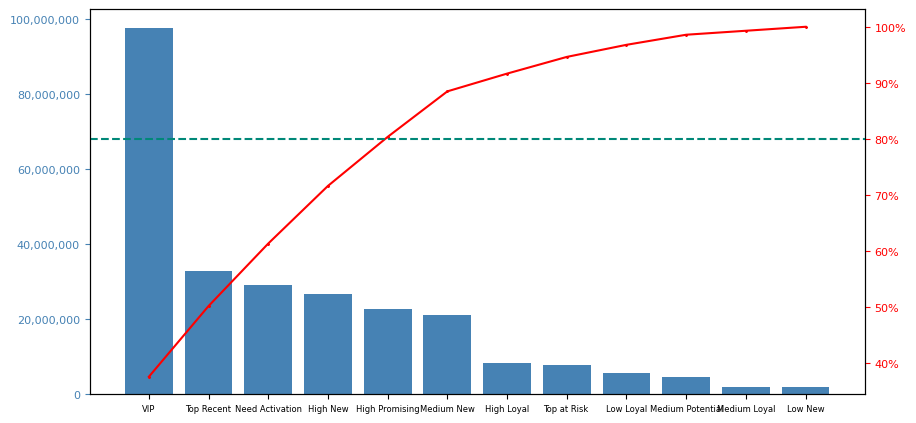

In [61]:

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(seg_pareto['Segment_labels'], seg_pareto['Monetary'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(seg_pareto['Segment_labels'], seg_pareto['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 6)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()